## Задача:
К вам приходит руководитель продукта “Интернет-магазин” и спрашивает про удержание клиентов и повторные покупки. У него есть опасение, что из-за проблем с доставкой товаров в магазине у нас стали больше оттекать пользователи. Он просит вас сравнить, на сколько сейчас все хуже, чем в прошлом году? 

* Проверить гипотезу руководителя продукта 
* Дать руководителю продукта инструмент для самостоятельного принятия решений по качеству удержания пользовательской базы

## Решение:

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Считываем данные для анализа
df_customers = pd.read_csv('customers.csv')
df_orders = pd.read_csv('orders.csv')

In [3]:
df_customers.sample(5)

,id,name,segment,state,city
124,AH-10195,Alan Haines,Corporate,Florida,Tamarac
670,EM-14140,Eugene Moren,Home Office,Arizona,Glendale
198,MD-17350,Maribeth Dona,Consumer,Arkansas,Fayetteville
318,BK-11260,Berenike Kampe,Consumer,New York,New York City
615,CR-12580,Clay Rozendal,Home Office,Illinois,Elmhurst


In [5]:
df_orders.sample(5)

,id,order_date,ship_mode,customer_id,sales
3375,128363,2017-08-13,Standard,DC-12850,2382.926
4395,120712,2015-12-20,Standard,CS-12130,88.800
3087,114552,2017-09-02,Standard,Dl-13600,15.072
4011,160927,2017-01-29,Second,TM-21010,136.200
1868,111318,2016-07-23,First,IL-15100,115.136


In [6]:
# Определяем промежуток времени для проверки гипотезы руководителя
print(df_orders['order_date'].min(), '-', df_orders['order_date'].max())

2014-01-03 - 2017-12-30


**Сформулируем гипотезу руководителя:** Retention rate в 2017 году < Retention rate в 2016 году

In [7]:
# Добавим колонки с месяцем и годом заказа
df_orders['order_month'] = df_orders['order_date'].apply(lambda x: x[0:7])
df_orders['order_year'] = df_orders['order_date'].apply(lambda x: x[0:4])
df_orders.sample(5)

,id,order_date,ship_mode,customer_id,sales,order_month,order_year
2522,153178,2016-09-14,Standard,CL-12565,1111.418,2016-09,2016
1402,145394,2015-11-16,Standard,MC-17605,295.968,2015-11,2015
1806,107146,2016-06-17,First,LC-16885,749.488,2016-06,2016
3352,127306,2017-01-14,Standard,BH-11710,175.086,2017-01,2017
1937,114944,2016-01-30,Standard,HE-14800,156.512,2016-01,2016


In [8]:
# Объединим таблицы orders и customers по полю "customer_id"
df_customers = df_customers.rename(columns={'id':'customer_id'}) 
df_orders = df_orders.rename(columns={'id':'order_id'}) 
df = pd.merge(df_orders, df_customers)
df.sample(5)

,order_id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city
467,132227,2014-11-04,Standard,SZ-20035,52.064,2014-11,2014,Sam Zeldin,Home Office,California,Pico Rivera
1270,157728,2016-09-22,Standard,RC-19960,133.540,2016-09,2016,Ryan Crowe,Consumer,Ohio,Columbus
2745,133312,2017-11-25,Standard,BD-11500,369.979,2017-11,2017,Bradley Drucker,Consumer,Wisconsin,Green Bay
194,101931,2014-10-28,First,TS-21370,1252.602,2014-10,2014,Todd Sumrall,Corporate,New York,New York City
2488,161172,2017-03-16,Same Day,SP-20920,315.041,2017-03,2017,Susan Pistek,Consumer,California,Los Angeles


In [9]:
# Посмотрим, сколько новых пользователей приходило каждый год
first_orders = df_orders.groupby('customer_id')['order_date'].min().to_frame()
first_orders['first_order_year'] = first_orders['order_date'].apply(lambda x: x[0:4])
orders_merged = df_orders.merge(first_orders, how='inner', left_on='customer_id', right_index=True)

In [10]:
orders_merged.groupby('first_order_year').count()['order_id']

first_order_year
2014    4020
2015     739
2016     231
2017      19
Name: order_id, dtype: int64

Видим, что с каждым годом в компании все меньше новых клиентов

In [11]:
df_2016 = df[df.order_year == '2016']
df_2016.sample(5)

,order_id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city
3974,134362,2016-09-29,First,LS-16945,15.936,2016-09,2016,Linda Southworth,Corporate,Pennsylvania,Philadelphia
1879,113607,2016-10-14,Standard,PW-19030,1203.890,2016-10,2016,Pauline Webber,Corporate,Kentucky,Richmond
1175,102813,2016-07-02,First,EA-14035,569.902,2016-07,2016,Erin Ashbrook,Corporate,North Carolina,Charlotte
1754,139381,2016-04-18,Standard,RF-19840,233.480,2016-04,2016,Roy Franzosisch,Consumer,New York,New York City
3491,145240,2016-09-06,First,BG-11740,10.784,2016-09,2016,Bruce Geld,Consumer,Pennsylvania,Philadelphia


In [12]:
df_2017 = df[df.order_year == '2017']
df_2017.sample(5)

,order_id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city
2346,129581,2017-12-11,Standard,KN-16390,128.850,2017-12,2017,Katherine Nockton,Corporate,California,Los Angeles
3045,101784,2017-07-06,Standard,PO-18850,122.136,2017-07,2017,Patrick O'Brill,Consumer,Pennsylvania,Philadelphia
2084,160416,2017-11-13,Second,AD-10180,163.960,2017-11,2017,Alan Dominguez,Home Office,Texas,Houston
4713,117156,2017-03-21,Second,TB-21055,8.856,2017-03,2017,Ted Butterfield,Consumer,New York,Troy
279,140781,2017-08-03,Standard,AB-10105,39.816,2017-08,2017,Adrian Barton,Consumer,Arizona,Phoenix


In [13]:
# Объем продаж в 2016 и 2017 годах
sales_16 = df_2016['sales'].sum()
print('Объем продаж в 2016 году:', sales_16)
sales_17 = df_2017['sales'].sum()
print('Объем продаж в 2017 году:', sales_17)

Объем продаж в 2016 году: 609205.598
Объем продаж в 2017 году: 733215.2552


In [14]:
print('Продажи в 2017 году выросли на', round((sales_17/sales_16 - 1)*100), '%')

Продажи в 2017 году выросли на 20 %


In [15]:
cohorts_2016 = df_2016.groupby('customer_id',as_index=False)['order_month'].min()
cohorts_2016.rename(columns = {'order_month':'Cohort'},inplace=True)
cohorts_2016.head()

,customer_id,Cohort
0,AA-10315,2016-03
1,AA-10375,2016-07
2,AA-10480,2016-07
3,AA-10645,2016-07
4,AB-10015,2016-11


In [16]:
merged_2016= pd.merge(df_2016, cohorts_2016 , how='left', on='customer_id')
merged_2016.head()

,order_id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city,Cohort
0,111290,2016-07-22,Standard,DK-13375,1137.400,2016-07,2016,Dennis Kane,Consumer,Ohio,Marion,2016-07
1,139087,2016-07-17,Second,DK-13375,656.400,2016-07,2016,Dennis Kane,Consumer,Ohio,Marion,2016-07
2,128223,2016-06-14,Same Day,EB-13705,1293.488,2016-06,2016,Ed Braxton,Corporate,Ohio,Akron,2016-03
3,137547,2016-03-07,Standard,EB-13705,21.072,2016-03,2016,Ed Braxton,Corporate,Ohio,Akron,2016-03
4,162404,2016-07-23,Standard,NF-18475,11.416,2016-07,2016,Neil Franzosisch,Home Office,Illinois,Rockford,2016-07


In [17]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [18]:
analyse_2016 = merged_2016.groupby(['Cohort', 'order_month']).agg({'customer_id': pd.Series.nunique})
analyse_2016.rename(columns={'customer_id': 'total_user','order_id': 'total_order'}, inplace=True)
analyse_2016 = analyse_2016.groupby(level=0).apply(cohort_period)
analyse_2016.reset_index(inplace=True)
analyse_2016.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
analyse_2016_size = analyse_2016['total_user'].groupby(level=0).first()
retention_2016 = analyse_2016['total_user'].unstack(0).divide(analyse_2016_size, axis=1)

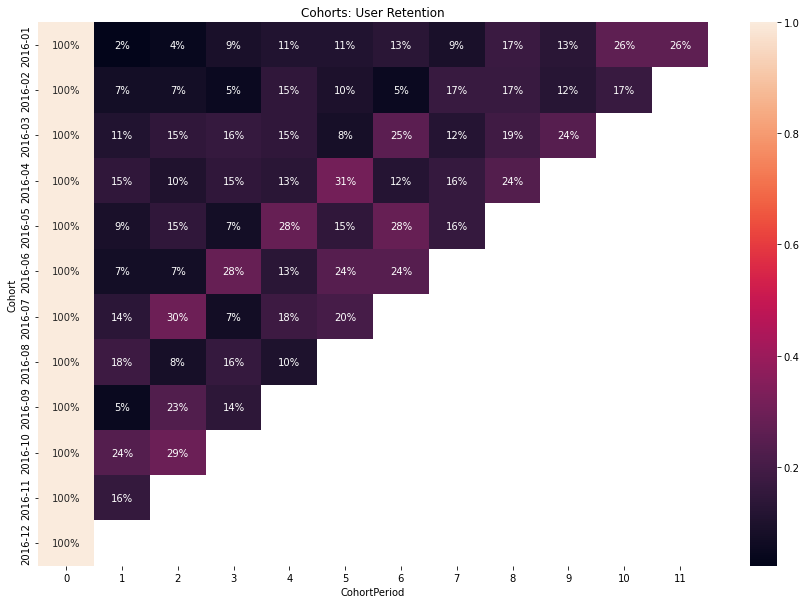

In [19]:
plt.figure(figsize=(15, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_2016.T, mask=retention_2016.T.isnull(), annot=True, fmt='.0%');

In [49]:
cohorts_2017= df_2017.groupby('customer_id',as_index=False)['order_month'].min()
cohorts_2017.rename(columns = {'order_month':'Cohort'},inplace=True)
cohorts_2017.head()

,customer_id,Cohort
0,AA-10315,2017-06
1,AA-10375,2017-09
2,AA-10480,2017-04
3,AA-10645,2017-11
4,AB-10060,2017-05


In [50]:
merged_2017 = pd.merge(df_2017, cohorts_2017 , how='left', on='customer_id')
merged_2017.head()

,order_id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city,Cohort
0,133046,2017-07-27,Second,DK-13375,297.990,2017-07,2017,Dennis Kane,Consumer,Ohio,Marion,2017-07
1,165099,2017-12-11,First,DK-13375,1.392,2017-12,2017,Dennis Kane,Consumer,Ohio,Marion,2017-07
2,166835,2017-11-12,Second,DK-13375,221.024,2017-11,2017,Dennis Kane,Consumer,Ohio,Marion,2017-07
3,107797,2017-05-08,Second,EB-13705,41.472,2017-05,2017,Ed Braxton,Corporate,Ohio,Akron,2017-05
4,134978,2017-11-12,Second,EB-13705,15.920,2017-11,2017,Ed Braxton,Corporate,Ohio,Akron,2017-05


In [52]:
analyse_2017 = merged_2017.groupby(['Cohort', 'order_month']).agg({'customer_id': pd.Series.nunique})
analyse_2017.rename(columns={'customer_id': 'total_user',
                        'id': 'total_order'}, inplace=True)
analyse_2017 = analyse_2017.groupby(level=0).apply(cohort_period)
analyse_2017.reset_index(inplace=True)
analyse_2017.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
analyse_2017_size = analyse_2017['total_user'].groupby(level=0).first()
retention_2017 = analyse_2017['total_user'].unstack(0).divide(analyse_2017_size, axis=1)

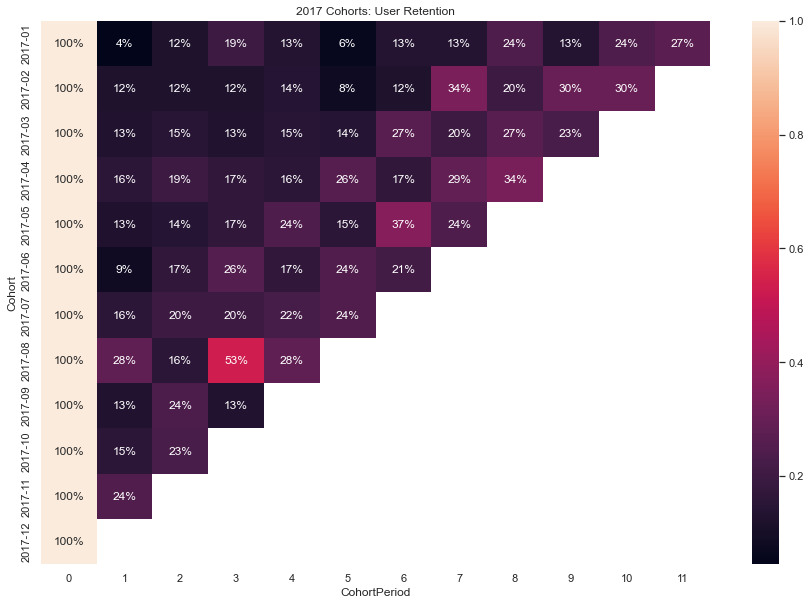

In [54]:
plt.figure(figsize=(15, 10))
plt.title('2017 Cohorts: User Retention')
sns.heatmap(retention_2017.T, mask=retention_2017.T.isnull(), annot=True, fmt='.0%');

## Выводы:
* Объем продаж в 2017 вырос по сравнению с 2016 годом на 20%, несмотря на то, что новых клиентов пришло меньше 
* Retention rate за 2017 год выше, чем за 2016  

По результатам проведенного анализа мы отвергаем гипотезу руководителя. 
В качестве инструмента для самостоятельного принятия решений по качеству удержания пользовательской базы руководителю продукта предлагается воспользоваться картами User Retention.
Также можно провести анализ отдельных категорий клиентов/вариантов доставки для более детальной аналитики.